__CSC420__ <br>
Assignment 3 <br>
Danil Redko 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from scipy.spatial.distance import euclidean as euc
import matplotlib.patches as patches
from skimage import transform as tf
from skimage.transform import ProjectiveTransform
%matplotlib inline


Upload the images and transfrom from 

In [3]:
reference = cv2.imread('reference.png', 1)
test1 = cv2.imread('test.png', 1) 
test2 = cv2.imread('test2.png',1) 
images = [reference, test1, test2]

In [4]:
def get_interest_points(img, showAllpoints=True):
    img1 = img.copy()
    sift = cv2.xfeatures2d.SIFT_create()
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    kp, des = sift.detectAndCompute(gray, None)
    if not showAllpoints:
        kp=kp[:100]
    return cv2.drawKeypoints(gray, kp, img1, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS), kp, des

In [5]:
def matching(img1, img2):
    
    _, kp1, des1 = get_interest_points(img1)
    _, kp2, des2 = get_interest_points(img2)
    match = []
    kp_diff = []

    for j in range(0, len(kp1)):

        for i in range(0, len(kp2)):
            euc_dist = euc(des1[j], des2[i])
            if euc_dist < 100:
                kp_diff.append(euc_dist)
                match.append([kp1[j],kp2[i]])
                

    three_best = np.argpartition(kp_diff, 3)[:3]
        
    match1 = match[three_best[0]]
    
    match2 = match[three_best[1]]
    
    match3 = match[three_best[2]]
        
        
    return match1, match2, match3




In [6]:
def match_images(img1, img2):
    
    img1_show = img1.copy()
    img2_show = img2.copy()
    
    kp1, kp2, kp3 = matching(img1, img2)
    
    
    x1, y1 = kp1[0].pt 
    x2, y2 = kp1[1].pt
    
    x3, y3 = kp2[0].pt 
    x4, y4 = kp2[1].pt
    
    x5, y5 = kp3[0].pt 
    x6, y6 = kp3[1].pt
    
    
    f = plt.figure(figsize=(20,20))
    f.add_subplot(1,2, 1)
    plt.scatter(x1, y1, color='r', linewidth=50)
    plt.scatter(x3, y3, color='b',  linewidth=50)
    plt.scatter(x5, y5, color='y',  linewidth=50)
    plt.imshow(img1_show[:,:,::-1])
    f.add_subplot(1,2,2)
    plt.imshow(img2_show[:,:,::-1])
    plt.scatter(x2, y2, color='r',  linewidth=20)
    plt.scatter(x4, y4, color='b',  linewidth=20)
    plt.scatter(x6, y6, color='y',  linewidth=20)
    

    
    
    
    

In [14]:
img1, _,_  = get_interest_points(images[0], False)

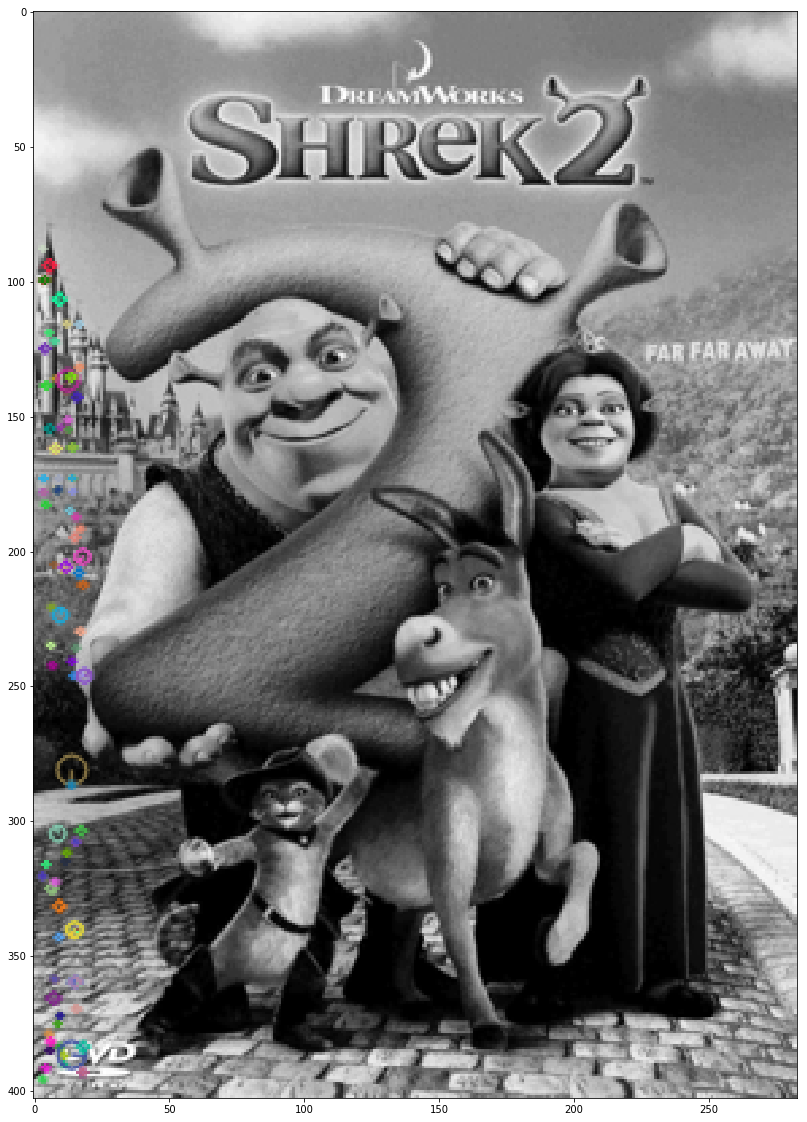

In [15]:
f = plt.figure(figsize=(20,20))
plt.imshow(img1)

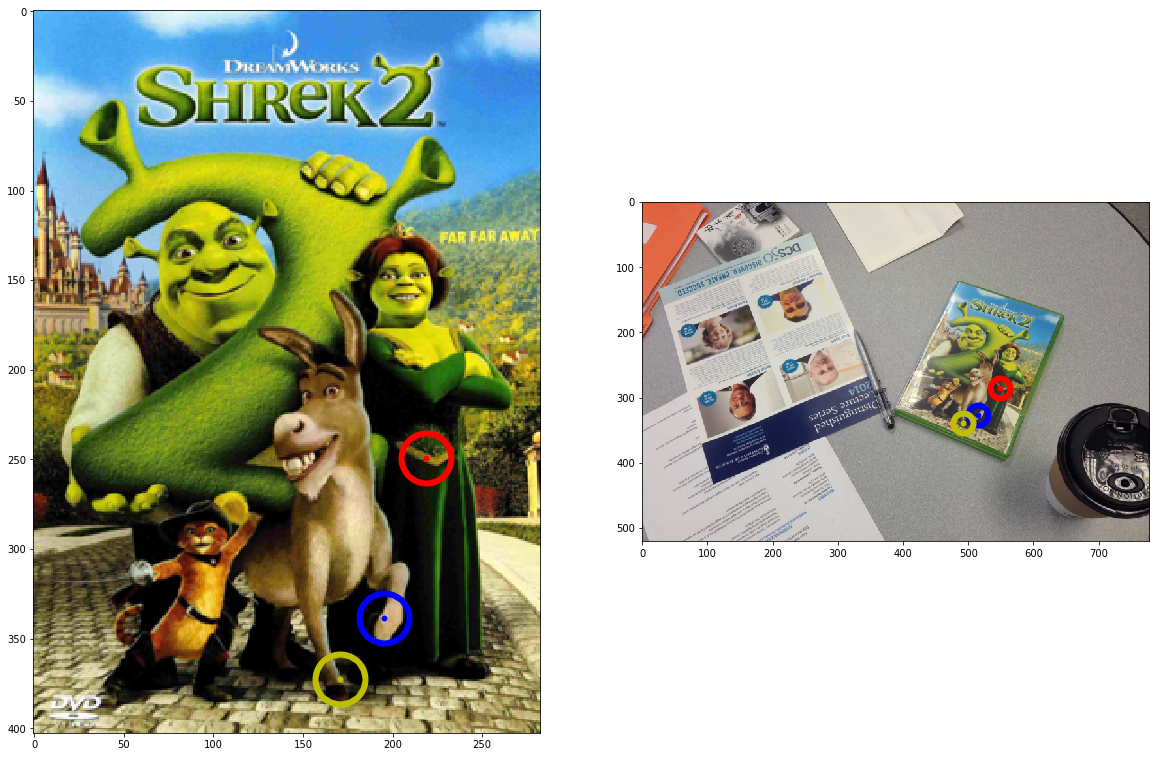

In [16]:
match_images(images[0], images[1])

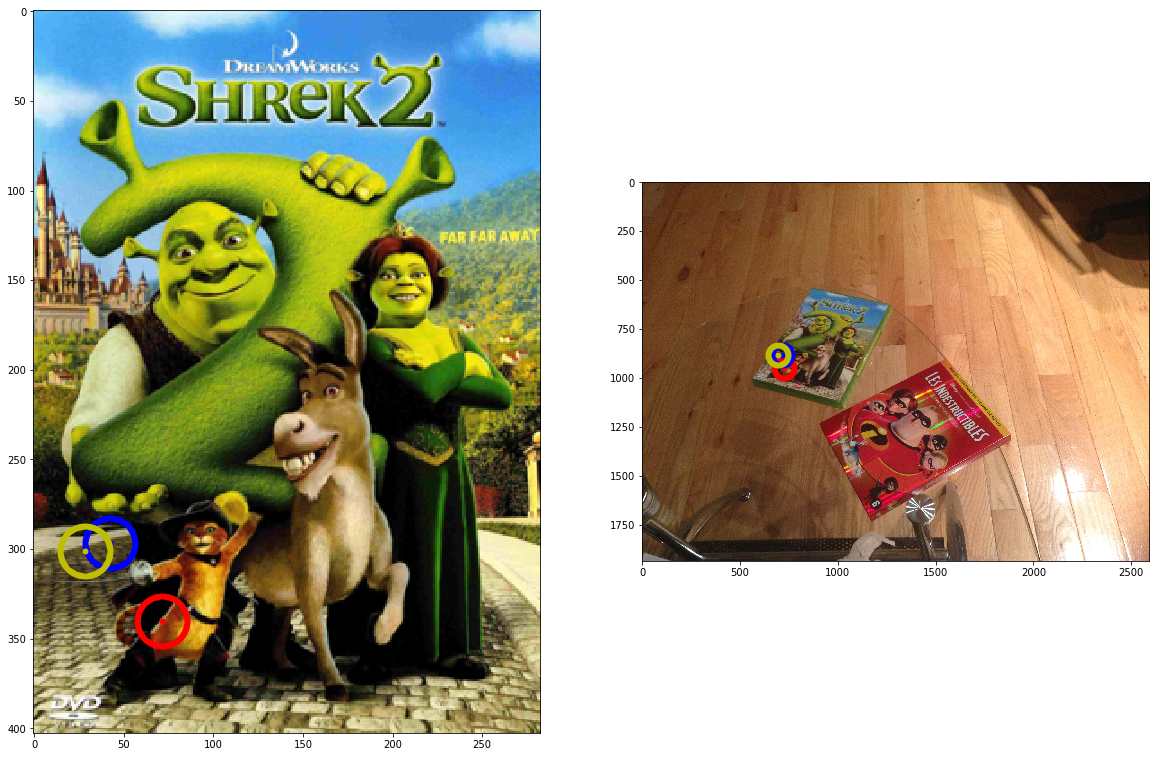

In [17]:
match_images(images[0], images[2])

__[2 points]__ Affline transformation: Use the top 3 correspondences from
part (b) to solve for the ane transformation between the features in the two
images.

In [18]:
def affine_transformation(x, y, tran):
    
    A  = np.array([[x, y, 1, 0, 0 , 0], [0, 0, 0, x, y, 1]])
    
    sol = np.dot(A, tran)
        
    return sol[0], sol[1]
    
    

In [19]:
kp1, kp2, kp3 = matching(images[0], images[1])

In [20]:
def solve_for_A(img1, img2, k1, kp2, kp3):
    
    
    #kp1, kp2, kp3 = matching(img1, img2)
    
    # First Image Key Points
    x1, y1 = kp1[0].pt 
    x3, y3 = kp2[0].pt 
    x5, y5 = kp3[0].pt
    
    #Second Image Key Points
    x2, y2 = kp1[1].pt
    x4, y4 = kp2[1].pt
    x6, y6 = kp3[1].pt
    
    b = np.array([x2,y2,x4,y4,x6,y6])
    
    A = np.array([[x1, y1, 1, 0, 0, 0], [0, 0, 0, x1, y1, 1], 
                  [x3, y3, 1, 0, 0, 0], [0, 0, 0, x3, y3, 1],
                  [x5, y5, 1, 0, 0, 0], [0, 0, 0, x5, y5, 1]])
    
    transformation = np.linalg.solve(A, b)
        
    img1x, img1y, _ = img1.shape
    
    left_up_x, left_up_y = 0, 0
    left_bottom_x, left_bottom_y = 0, img1x
    right_up_x, right_up_y = img1y, 0
    right_bottom_x, right_bottom_y = img1y, img1x
    
    
    p1 = affine_transformation( 0, 0 , transformation)
    p2 = affine_transformation(0, img1x, transformation)
    p3 = affine_transformation(img1y, 0, transformation)
    p4 = affine_transformation(img1y, img1x, transformation)
    
    f = plt.figure(figsize=(20,20))
    plt.imshow(img2[:,:,::-1])
    plt.plot((p1[0], p2[0]), (p1[1], p2[1]), c='r', linewidth=5)
    plt.plot((p1[0], p3[0]), (p1[1], p3[1]), c='r', linewidth=5)
    plt.plot((p2[0], p4[0]), (p2[1], p4[1]), c='r', linewidth=5)
    plt.plot((p3[0], p4[0]), (p3[1], p4[1]), c='r', linewidth=5)
      
    plt.show()
    


In [21]:
def plot_rect(p1,p2,p3,p4,color,linewidth=2):
    plt.plot((p1[0], p2[0]), (p1[1], p2[1]), c=color, linewidth=linewidth)
    plt.plot((p1[0], p3[0]), (p1[1], p3[1]), c=color, linewidth=linewidth)
    plt.plot((p2[0], p4[0]), (p2[1], p4[1]), c=color, linewidth=linewidth)
    plt.plot((p3[0], p4[0]), (p3[1], p4[1]), c=color, linewidth=linewidth)

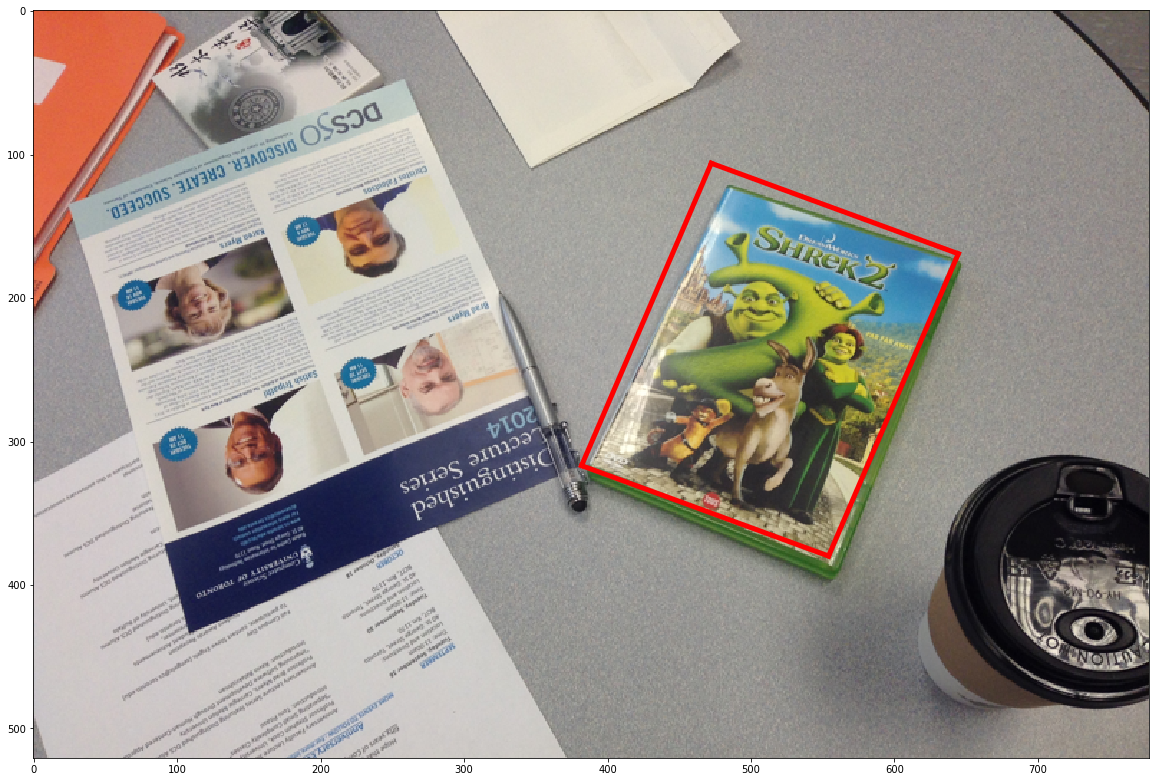

In [22]:
solve_for_A(images[0], images[1], kp1, kp2, kp3)

__[2.5 points]__ Take an item for which you know the width and height (in cm), for
example a piece of paper or a dollar bill. Place the item next to or in front of the
door. Take a picture of the door such that all four corners of the door are visible
on the photo. Take this picture in an oblique view, ie, the door is not a perfect
rectangle but rather a quadrilateral in the photo. Estimate the width and height
of the door (in cm) from the picture.

In [23]:
door1 = cv2.imread('door3.png', 1)[:,:,::-1]

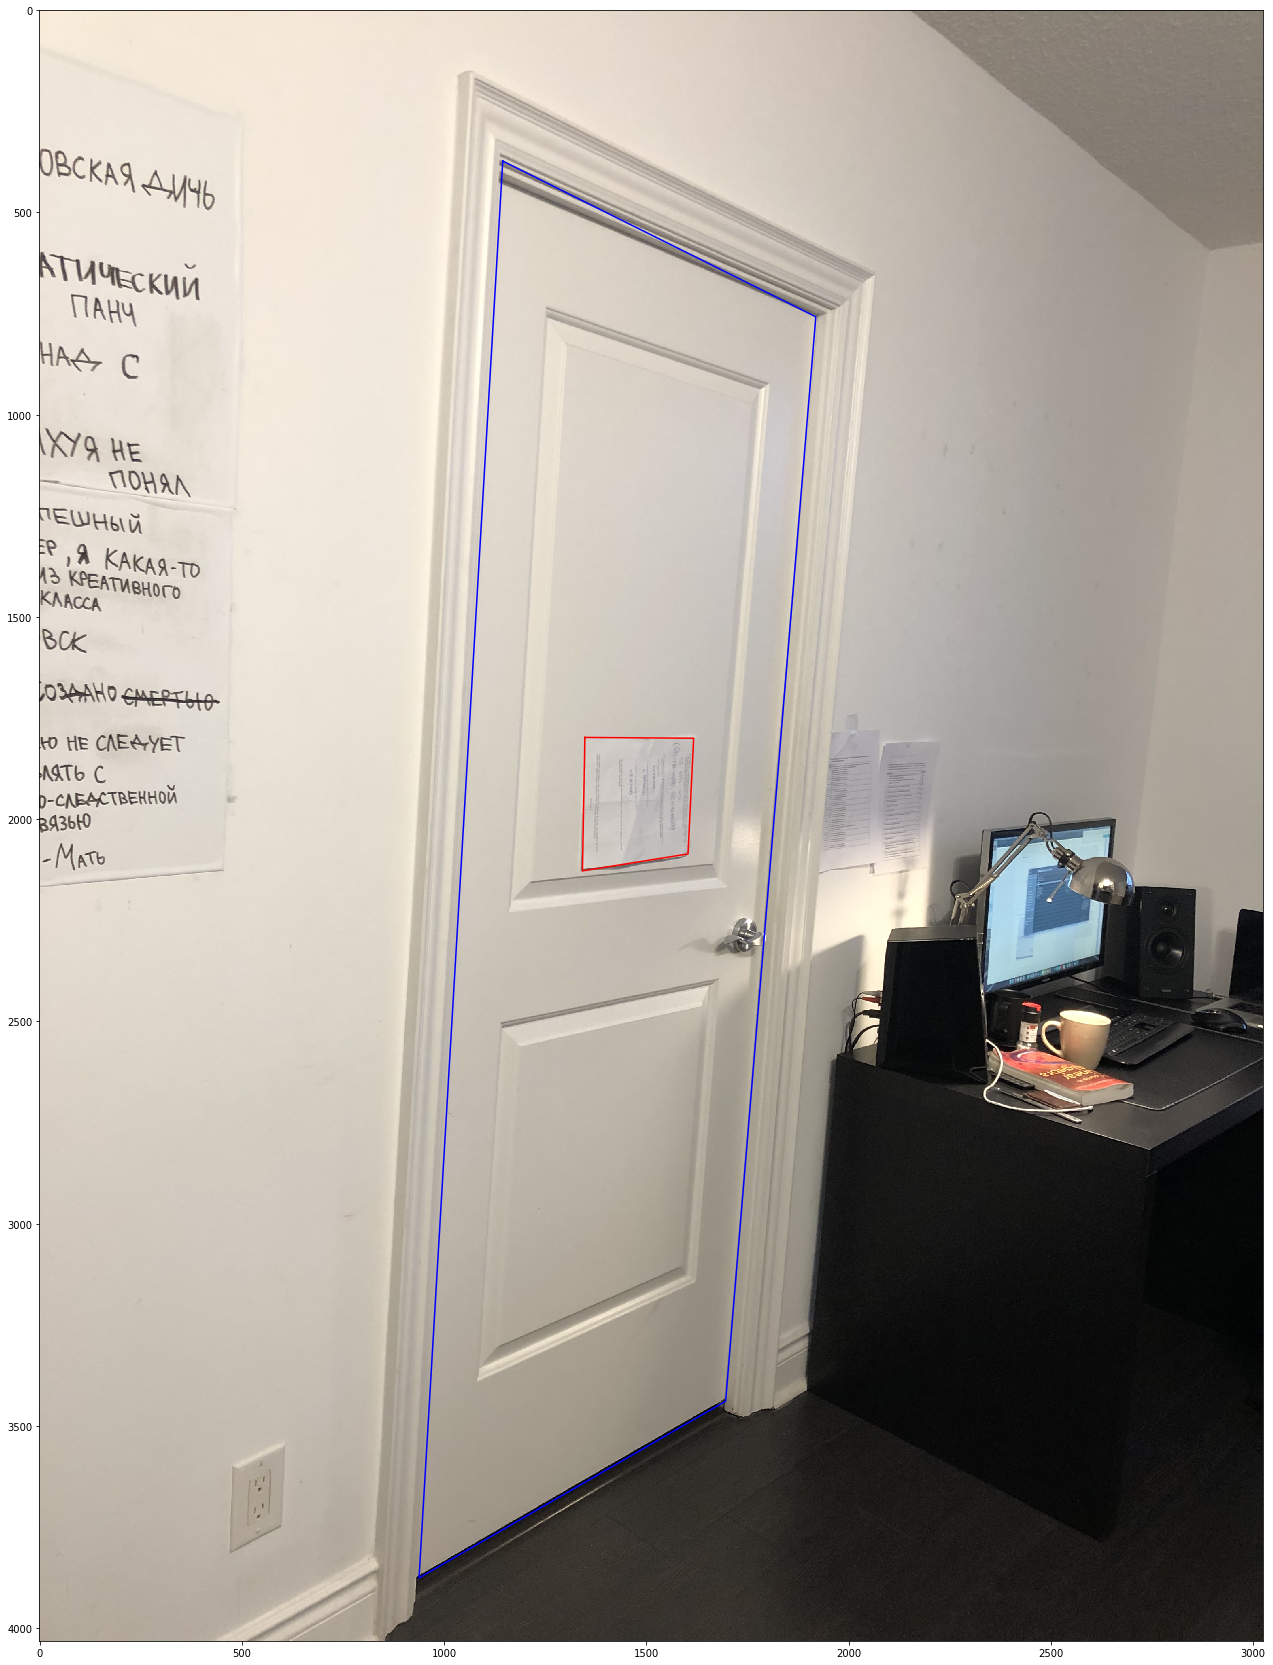

In [24]:
f = plt.figure(figsize=(30,30))
door_coordinates =  np.array([[1145, 373], [1919, 758], [1696,3439 ], [938, 3876]])
paper_coordinates = np.array([ [1348, 1798],[1617, 1800],  [1603, 2086],[1342, 2128]])
x = list(paper_coordinates[:,[0]].flatten())
y = list(paper_coordinates[:,[1]].flatten())
xt = list(door_coordinates[:,[0]].flatten())
yt = list(door_coordinates[:,[1]].flatten())
plt.plot(x+x[:1], y+y[:1], 'r')
plt.plot(xt+xt[:1], yt+yt[:1], 'b')
plt.imshow(door1)

In [25]:
f=30 # each cm is f pixels
x2=[0+1,   29.7*f+1, 29.7*f+1 , 0+1  ]
y2=[0+1,   0+1,   22*f+1, 22*f+1 ]

In [26]:
src = np.vstack((x, y)).T
dst = np.vstack((x2, y2)).T
tform = tf.estimate_transform('projective', src, dst)

width of the door 80.2974586403
height f the door 249.745611008


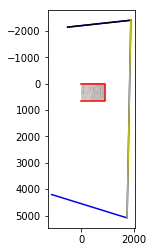

In [28]:
warped = tf.warp(door1, inverse_map=tform.inverse, output_shape=(f*22, f*29.7) )
src_door = np.row_stack((xt, yt, [1]*4)) 
X_hom = tform.params.dot(src_door)
X_hom = X_hom / X_hom[2,:]
plt.imshow(warped)
plt.plot(x2, y2, 'r')
plt.plot(X_hom[0,:], X_hom[1,:], 'b')


# Getting the coordinates of the corners to estimate the width and the height 
upper_right_corner = [X_hom[0,:][np.argmin(X_hom[1,:])], X_hom[1,:][np.argmin(X_hom[1,:])]]

bottom_right_corner = [X_hom[0,:][np.argmax(X_hom[1,:])], X_hom[1,:][np.argmax(X_hom[1,:])]]

upper_left_corner = [X_hom[0,:][0], X_hom[1,:][0]]

# Plot the estimated width 
plt.plot([upper_left_corner[0], upper_right_corner[0]] , [upper_left_corner[1], upper_right_corner[1]], 'black')

plt.plot([bottom_right_corner[0], upper_right_corner[0]] , [bottom_right_corner[1], upper_right_corner[1]], 'y')


# Compute the distance between the points and divide by the number of pixels to get cm
width = euc(upper_left_corner, upper_right_corner) / f

height = euc(upper_right_corner, bottom_right_corner) / f

print('width of the door {}'.format(width))
print('height f the door {}'.format(height))

